# Analyzing Sales Data

In [1]:
#import your packages here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load the sales data here
df = pd.read_csv('sales_data.csv')#Reading csv
df.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


In [3]:
# Cleaning the Data
# Removing an unwanted column

df = df.drop("Unnamed: 0", axis=1)
df.head(4)

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060


In [4]:
# Average sales and profit per market
average_sales_and_profit = df.groupby('Market').agg({'Sales':(np.nanmean),'Profit':(np.nanmean)})
average_sales_and_profit.head()

,Sales,Profit
Market,,
APAC,337.225210,42.596237
Africa,177.023796,20.623734
Canada,180.765566,48.391132
EMEA,156.453122,8.102479
EU,297.415215,38.373754


In [5]:
# Total sales and profit per market.
sales_and_profit = df.groupby('Market').agg({'Sales':(np.sum),'Profit':(np.sum)})
sales_and_profit = sales_and_profit.reset_index()
sales_and_profit.head()

,Market,Sales,Profit
0,APAC,974580.8559,123103.1259
1,Africa,229068.7920,26687.1120
2,Canada,19161.1500,5129.4600
3,EMEA,204640.6830,10598.0430
4,EU,761680.3650,98275.1850


Text(0.5, 1.0, 'Total Sales and Profit per Market')

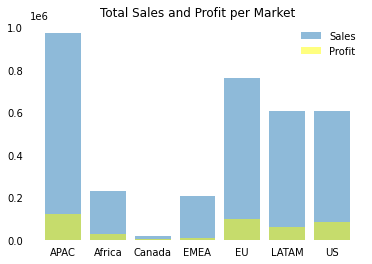

In [6]:
# Stacked bar chart of total sales and profit
plt.figure()
sales=plt.bar(sales_and_profit["Market"],sales_and_profit["Sales"], alpha=0.5, label = "Sales")
profit=plt.bar(sales_and_profit["Market"],sales_and_profit["Profit"], alpha=0.5, label = "Profit", color = 'yellow')
plt.legend(frameon=False)
ax = plt.gca()

#removing frames from the graph
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tick_params(left=False, bottom= False)
plt.title("Total Sales and Profit per Market")

In [7]:
# Market that brings more sales on the average?
max_sales = average_sales_and_profit['Sales'].max()
average_sales_and_profit[average_sales_and_profit['Sales']==max_sales]


,Sales,Profit
Market,,
APAC,337.22521,42.596237


#### APAC brings more sales on the average

In [8]:
# Best 10 performing products with regards to sales in 2013?
best_10 = df[['Product Name','Sales']]
best_10 = best_10.sort_values('Sales',ascending=False).reset_index()[0:10]
best_10 = best_10.drop("index",axis=1)
best_10

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,17499.950
1,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
2,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
3,HP Designjet T520 Inkjet Large Format Printer ...,8749.950
4,Canon imageCLASS 2200 Advanced Copier,8399.976
5,"Motorola Smart Phone, Full Size",6439.800
6,"Apple Smart Phone, with Caller ID",5751.540
7,"Samsung Smart Phone, VoIP",5726.160
8,"Barricks Conference Table, Fully Assembled",5451.300
9,Hewlett Packard LaserJet 3310 Copier,5399.910


In [9]:
# Least 10 performing products with regards to sales 2013?
least_10 = df[['Product Name','Sales']]
least_10 = least_10.sort_values('Sales',ascending=True).reset_index()[0:10]#Least 10 performing products
least_10 = least_10.drop("index",axis=1)
least_10

,Product Name,Sales
0,Avery Durable Slant Ring Binders With Label Ho...,0.836
1,"Avery Hole Reinforcements, Clear",1.161
2,Avery Hidden Tab Dividers for Binding Systems,1.192
3,Insertable Tab Indexes For Data Binders,1.272
4,"Avery Hole Reinforcements, Economy",1.323
5,Computer Printout Index Tabs,1.344
6,Prang Dustless Chalk Sticks,1.344
7,Newell 310,1.408
8,"Cardinal Hole Reinforcements, Clear",1.440
9,"OIC #2 Pencils, Medium Soft",1.504


In [10]:
# 3i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?
def split_date(row):
    row['Days']=row['Order Date'].split('-')[-1]
    row['Months']=row['Order Date'].split('-')[1]
    return row
df_new = df.apply(split_date,axis = 'columns') #Added the Months and Days columns to the dataframe
df_new.head()

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,01,01
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,01,01
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,01,01
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060,01,01
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410,01,01


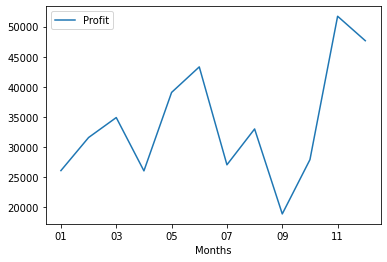

In [11]:
# Trend of profit from January to December using a line plot.
new_df = df_new.groupby('Months').agg({'Profit':np.sum}).reset_index()
new_df.plot(x="Months", y="Profit")
plt.show()

In [13]:
# Month the company make more profit and what 5 products are sold most in that month? 
max_profit = new_df['Profit'].max()
month_max_profit=new_df[new_df['Profit']==max_profit]
new_df2 = df_new.groupby(['Months','Product Name']).agg({'Sales':np.sum}).reset_index()
top_5 = new_df2[new_df2['Months']=='11']
top_5 = top_5.sort_values('Sales',ascending=False).reset_index()[0:5] #Top 5 products sold in November
top_5 = top_5.drop("index",axis=1)
top_5

,Months,Product Name,Sales
0,11,"Cisco Smart Phone, Full Size",5869.820
1,11,"SAFCO Executive Leather Armchair, Black",5370.300
2,11,"KitchenAid Stove, Red",4618.215
3,11,"Tenex Lockers, Wire Frame",4531.806
4,11,Cubify CubeX 3D Printer Double Head Print,4499.985


In [14]:
# Day of the month the company makes high sales on the average?
avg_day = df_new.groupby('Days').agg({'Sales':np.nanmean}).reset_index()
max_avg_sales = avg_day['Sales'].max()
avg_day[avg_day['Sales']==max_avg_sales]

,Days,Sales
1,02,318.411526


### November is the month the company makes more profit.
### The company makes high average sales on the second (02) day of the month.

In [16]:
# Correlation between sales and discount?
correlation =df['Sales'].corr(df['Discount'])
correlation

-0.08470981142655347

<AxesSubplot:xlabel='Sales'>

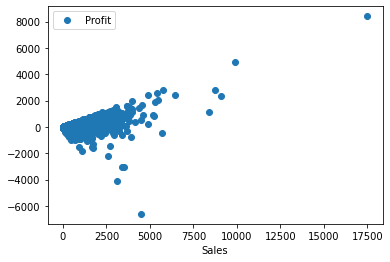

In [17]:
# A scatter plot showing the relationship between sales and profit.
df.plot(x='Sales', y='Profit', style='o')


In [27]:
# Customer which spent the most in the whole year.
expense_df = df.groupby('Customer Name').agg({'Sales':np.sum,'Product Name':np.sum})
expense_df_max = expense_df['Sales'].max()
expense_df_most = expense_df[expense_df['Sales']==expense_df_max]
expense_df_most


,Sales,Product Name
Customer Name,,
Tamara Chand,23190.408,Canon imageCLASS 2200 Advanced CopierIbico Ibi...


In [28]:
# Product does the Tamara buys the most?
expense_df_most['Product Name']


Customer Name
Tamara Chand    Canon imageCLASS 2200 Advanced CopierIbico Ibi...
Name: Product Name, dtype: object

In [39]:
# Month Tamara spent the most? 
Tamara_df = df_new[df_new['Customer Name']=='Tamara Chand']
Tamara_df = Tamara_df.groupby('Months').sum()["Sales"].reset_index()
Tamara_month_spend = Tamara_df['Sales'].max()
Tamara_df[Tamara_df['Sales']==Tamara_month_spend] 


,Months,Sales
1,03,18336.74


#### Tamara spent the most in the month of March with a total spending of 18336.74